In [1]:
import pandas as pd
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [3]:
df.describe(include="all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [4]:
#check null values if have replace with mean and median
#df['any col name'] = df.groupby('col name')['same col name'].transform(lambda x: x.fillna(x.median()))
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
#easy run in sql lower case the text
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')
df.columns

Index(['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'category', 'sub-category', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

In [6]:
# Drop rows where sales or profit is missing
df = df.dropna(subset=["sales", "profit"])

# Fill missing discount with 0
df["discount"] = df["discount"].fillna(0)


In [7]:
df = df.drop_duplicates()
df

,ship_mode,segment,country,city,state,postal_code,region,category,sub-category,sales,quantity,discount,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [8]:
# Convert numeric columns
numeric_cols = ["sales", "profit", "quantity", "discount"]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)


In [9]:
import numpy as np
df["profit_margin"] = np.where(
    df["sales"] != 0,
    df["profit"] / df["sales"],
    0
)
df


,ship_mode,segment,country,city,state,postal_code,region,category,sub-category,sales,quantity,discount,profit,profit_margin
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,0.1625
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,0.1700
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932,0.0750
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,0.4500


In [10]:
df["is_loss"] = np.where(df["profit"] < 0, 1, 0)


In [11]:
def discount_bucket(x):
    if x == 0:
        return "No Discount"
    elif x <= 0.2:
        return "Low Discount"
    elif x <= 0.5:
        return "Medium Discount"
    else:
        return "High Discount"

df["discount_level"] = df["discount"].apply(discount_bucket)
df

,ship_mode,segment,country,city,state,postal_code,region,category,sub-category,sales,quantity,discount,profit,profit_margin,is_loss,discount_level
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600,0,No Discount
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000,0,No Discount
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700,0,No Discount
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000,1,Medium Discount
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125,0,Low Discount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,0.1625,0,Low Discount
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,0.1700,0,No Discount
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932,0.0750,0,Low Discount
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,0.4500,0,No Discount


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ship_mode       9977 non-null   object 
 1   segment         9977 non-null   object 
 2   country         9977 non-null   object 
 3   city            9977 non-null   object 
 4   state           9977 non-null   object 
 5   postal_code     9977 non-null   int64  
 6   region          9977 non-null   object 
 7   category        9977 non-null   object 
 8   sub-category    9977 non-null   object 
 9   sales           9977 non-null   float64
 10  quantity        9977 non-null   int64  
 11  discount        9977 non-null   float64
 12  profit          9977 non-null   float64
 13  profit_margin   9977 non-null   float64
 14  is_loss         9977 non-null   int64  
 15  discount_level  9977 non-null   object 
dtypes: float64(4), int64(3), object(9)
memory usage: 1.3+ MB


In [13]:
df.head()

,ship_mode,segment,country,city,state,postal_code,region,category,sub-category,sales,quantity,discount,profit,profit_margin,is_loss,discount_level
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600,0,No Discount
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000,0,No Discount
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700,0,No Discount
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000,1,Medium Discount
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125,0,Low Discount


In [14]:
df.to_csv("sales_cleaned_featured.csv", index=False)

In [15]:
import pandas as pd
!pip install mysql-connector-python
import mysql.connector
df1 = pd.read_csv("sales_cleaned_featured.csv")
df1

,ship_mode,segment,country,city,state,postal_code,region,category,sub-category,sales,quantity,discount,profit,profit_margin,is_loss,discount_level
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600,0,No Discount
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000,0,No Discount
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700,0,No Discount
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000,1,Medium Discount
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125,0,Low Discount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,0.1625,0,Low Discount
9973,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,0.1700,0,No Discount
9974,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932,0.0750,0,Low Discount
9975,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,0.4500,0,No Discount


In [16]:
# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="1234",
    database="sales_project"
)

cursor = conn.cursor()
print(conn)

In [17]:
#Create Cohorts by Discount
cohort = df1.groupby("discount_level").agg({
    "sales": "sum",
    "profit": "sum",
    "profit_margin": "mean",
    "is_loss": "sum"
}).reset_index()

cohort["loss_rate"] = cohort["is_loss"] / df.groupby("discount_level").size().values

print(cohort)

    discount_level         sales       profit  profit_margin  is_loss  \
0    High Discount  6.422517e+04  -76552.8143      -1.138070      855   
1     Low Discount  8.464328e+05  100754.7755       0.174186      523   
2  Medium Discount  2.982600e+05  -58804.9459      -0.220057      491   
3      No Discount  1.087278e+06  320844.4073       0.340013        0   

   loss_rate  
0   1.000000  
1   0.137668  
2   0.916045  
3   0.000000  


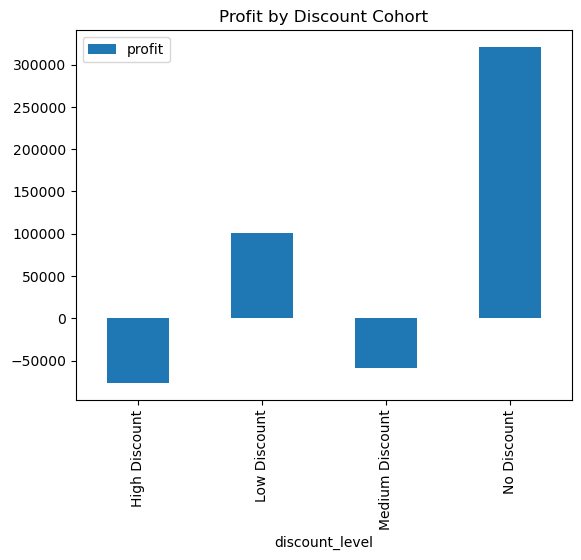

In [20]:
#Visualization
import matplotlib.pyplot as plt
cohort.plot(x="discount_level", y="profit", kind="bar", title="Profit by Discount Cohort")
plt.show()

In [21]:
#What happens if we reduce discount by 5% on high-discount orders?
df["new_discount"] = np.where(
    df["discount"] > 0.30,
    df["discount"] - 0.05,
    df["discount"]
)

# Assume profit improves proportionally
df["new_profit"] = df["profit"] + (df["discount"] - df["new_discount"]) * df["sales"]

before = df["profit"].sum()
after = df["new_profit"].sum()

print("Profit Before :", before)
print("Profit After  :", after)
print("Improvement % :", (after-before)/abs(before)*100)

Profit Before : 286241.4226
Profit After  : 299218.41914
Improvement % : 4.533584420496107


In [ ]:
#Reducing extreme discounts by 5% could improve profit by 4.5% without changing sales volume.

In [26]:
#SIMPLE LOSS PREDICTION USING MACHINE LEARNING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

ml = df1.copy()

# Encode categorical
for col in ["ship_mode","category","region","discount_level"]:
    ml[col] = LabelEncoder().fit_transform(ml[col])

In [27]:
X = ml[["sales","quantity","discount","profit_margin",
        "ship_mode","category","region"]]

y = ml["is_loss"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [24]:
#Train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1640
           1       1.00      1.00      1.00       356

    accuracy                           1.00      1996
   macro avg       1.00      1.00      1.00      1996
weighted avg       1.00      1.00      1.00      1996



In [28]:
#Feature Importance
imp = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

print(imp)


         feature  importance
3  profit_margin    0.659422
2       discount    0.298736
5       category    0.016205
0          sales    0.014032
6         region    0.008332
1       quantity    0.002373
4      ship_mode    0.000900


In [ ]:
#Discount and profit_margin were the strongest predictors of loss orders — validating the cohort analysis

In [29]:
#save as notebook
df1.to_csv("sales_ml_ready.csv", index=False)